In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

#LECTURA DATASET
dataset_anime=pd.read_csv('anime-rating.csv', on_bad_lines='skip')
dataset_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     11562 non-null  object 
 1   genre    11562 non-null  object 
 2   type     11562 non-null  object 
 3   rating   11562 non-null  float64
 4   members  11562 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 451.8+ KB


In [6]:
dataset= dataset_anime.drop(['name','genre','type'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   11562 non-null  float64
 1   members  11562 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 180.8 KB


In [7]:
#CLUSTERING MEMBRES RATING
df=pd.DataFrame(dataset)
x=df['members'].values
y=df['rating'].values

X=np.array(list(zip(x,y)))


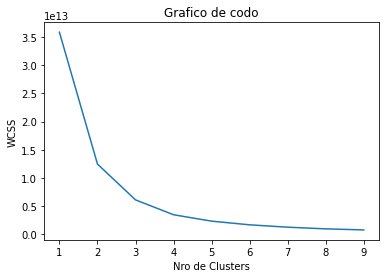

In [8]:
#GRAFICO DE CODO PARA CONCER LA CANTIDAD OPTIMA DE CLUSTERS
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)
plt.title("Grafico de codo")
plt.xlabel("Nro de Clusters")
plt.ylabel("WCSS")
plt.show()

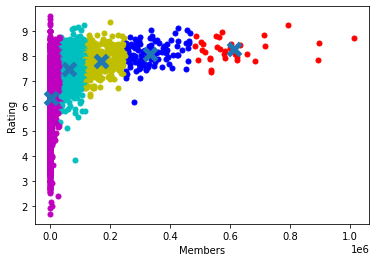

In [9]:
#CONFIGURANDO, EJECUTANDO CLUSTERING
km=KMeans(n_clusters=5)
km.fit(X)
labels=km.predict(X)
centroids=km.cluster_centers_

#ARMADO DE GRAFICO Y PRINT DE LAS COORDENADAS
colors=["m.","b.","c.","y.","r."]

for i in range(len(X)):
        #print("Coordenada: ",X[i],"Label: ",labels[i])
        plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)
plt.ylabel('Rating')
plt.xlabel('Members')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5,zorder=10)
plt.show()